In [1]:
titanic <- read.table('train.csv', sep=",", header = T)

In [2]:
rownames(titanic) <- titanic$PassengerId
titanic$PassengerId <- NULL
titanic$Name <- NULL

In [3]:
names(titanic)

[1] "Survived" "Pclass"   "Sex"      "Age"      "SibSp"    "Parch"   
 [7] "Ticket"   "Fare"     "Cabin"    "Embarked"

In [4]:
str(titanic)

'data.frame':	891 obs. of  10 variables:
 $ Survived: int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass  : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket  : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin   : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [5]:
titanic$Sex <- as.integer(titanic$Sex == 'female')

In [6]:
titanic$Pclass <- factor(titanic$Pclass)
titanic$Embarked <- factor(titanic$Embarked)

In [7]:
titanic$Ticket <- NULL
titanic$Cabin <- NULL

In [8]:
str(titanic)

'data.frame':	891 obs. of  8 variables:
 $ Survived: int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Age     : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [9]:
colSums(is.na(titanic))

Survived   Pclass      Sex      Age    SibSp    Parch     Fare Embarked 
       0        0        0      177        0        0        0        0

In [10]:
attach(titanic)

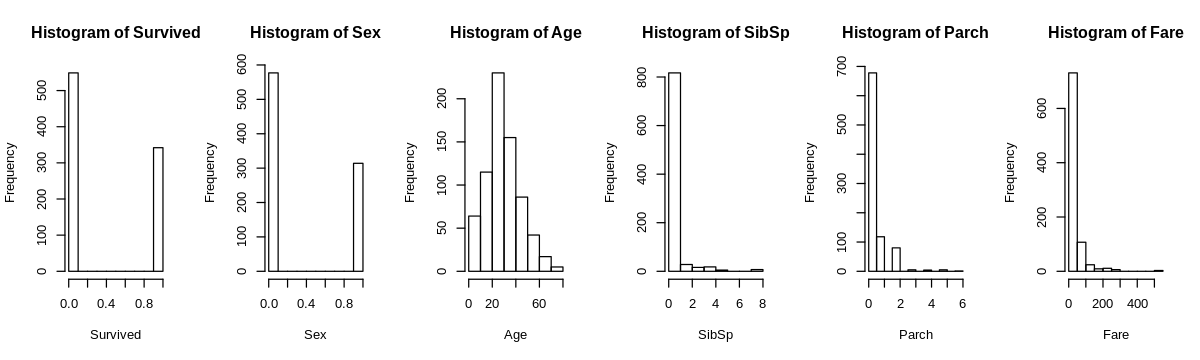

In [11]:
library(repr); options(repr.plot.width=10, repr.plot.height=3)
par(mfrow = c(1,6))
hist(Survived)
hist(Sex)
hist(Age)
hist(SibSp)
hist(Parch)
hist(Fare)

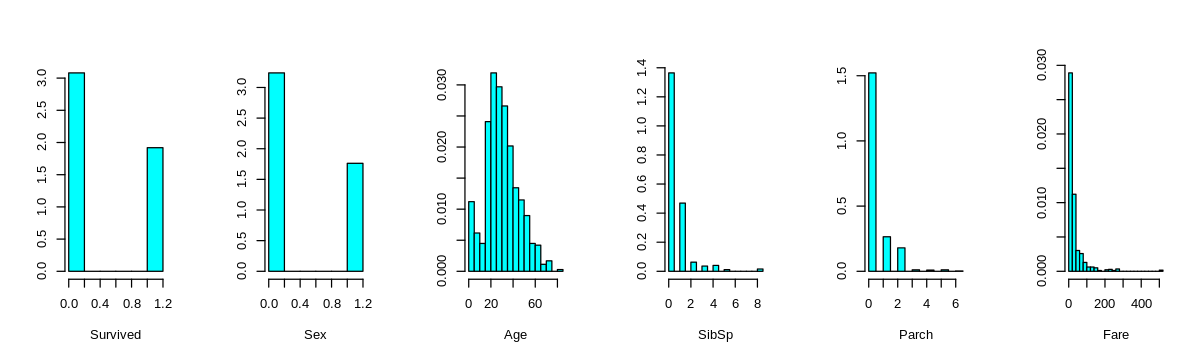

In [12]:
library(MASS)
par(mfrow = c(1,6))
truehist(Survived)
truehist(Sex)
truehist(Age)
truehist(SibSp)
truehist(Parch)
truehist(Fare)

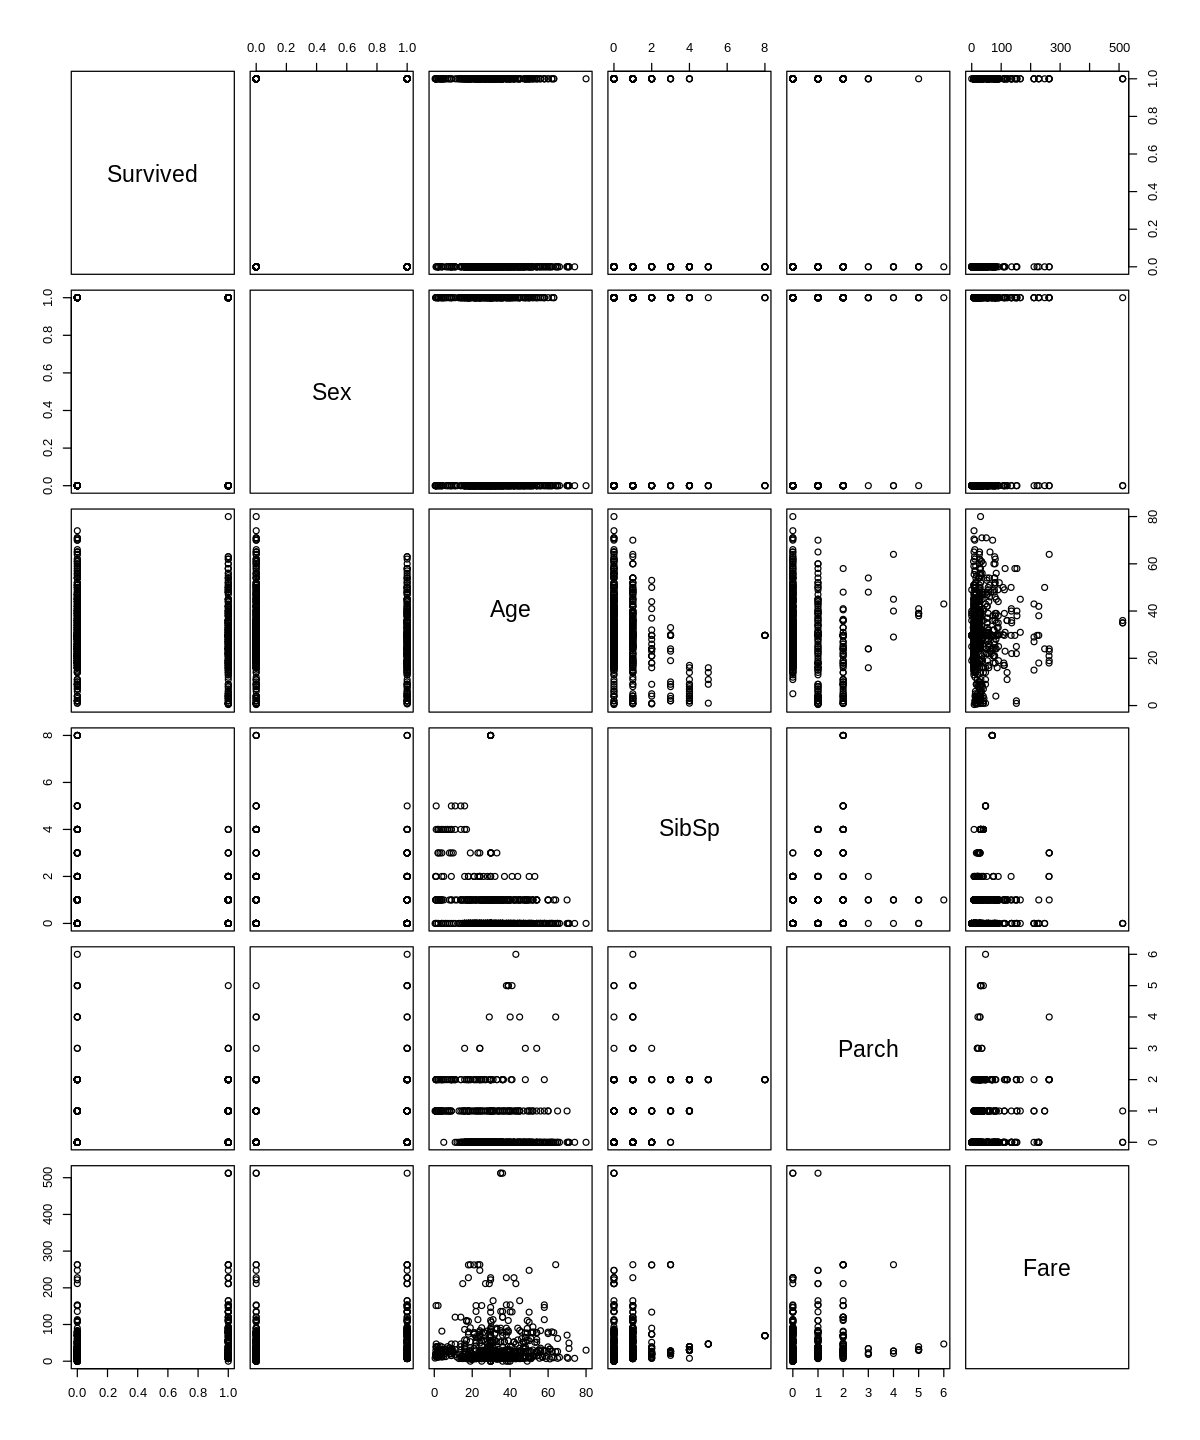

In [21]:
options(repr.plot.width=10, repr.plot.height=12)
pairs(titanic_numeric_features)

In [16]:
titanic_numeric_features <- Filter(is.numeric, titanic)

In [17]:
cor(titanic_numeric_features)

,Survived,Sex,Age,SibSp,Parch,Fare
Survived,1.00000000,0.5433514,NA,-0.0353225,0.08162941,0.2573065
Sex,0.54335138,1.0000000,NA,0.1146308,0.24548896,0.1823328
Age,NA,NA,1,NA,NA,NA
SibSp,-0.03532250,0.1146308,NA,1.0000000,0.41483770,0.1596510
Parch,0.08162941,0.2454890,NA,0.4148377,1.00000000,0.2162249
Fare,0.25730652,0.1823328,NA,0.1596510,0.21622494,1.0000000


In [18]:
mean(titanic_numeric_features$Age, na.rm = T)

[1] 29.69912

In [19]:
mean_age <- mean(titanic_numeric_features$Age, na.rm = T)
titanic_numeric_features$Age[is.na(titanic_numeric_features$Age)] <- mean_age

In [20]:
cor(titanic_numeric_features)

,Survived,Sex,Age,SibSp,Parch,Fare
Survived,1.00000000,0.54335138,-0.06980852,-0.0353225,0.08162941,0.25730652
Sex,0.54335138,1.00000000,-0.08415344,0.1146308,0.24548896,0.18233283
Age,-0.06980852,-0.08415344,1.00000000,-0.2326246,-0.17919092,0.09156609
SibSp,-0.03532250,0.11463081,-0.23262459,1.0000000,0.41483770,0.15965104
Parch,0.08162941,0.24548896,-0.17919092,0.4148377,1.00000000,0.21622494
Fare,0.25730652,0.18233283,0.09156609,0.1596510,0.21622494,1.00000000
